<a href="https://colab.research.google.com/github/savinthie/Final_Year_Project_IDP_2024-2025/blob/main/Model_6_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, ReLU, Concatenate, MaxPooling1D,Dropout
from tensorflow.keras.optimizers import Adam
import joblib
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/FYP 2024 25/USDataset.csv', header=1)
df = df.fillna(0)

Mounted at /content/drive


In [3]:
# Data Preprocessing
df.columns = [col.lower().replace(' ', '').replace('.', '') for col in df.columns]
cols_to_keep = ['stateabv', 'county', 'family', 'housing', 'food', 'transportation',
                'healthcare', 'othernecessities', 'childcare', 'taxes', 'total',
                'median_family_income', 'num_counties_in_st']
df1 = df[cols_to_keep].copy()

df1['median_family_income'] = df1['median_family_income'].replace(',', '', regex=True).astype(float)

In [4]:
# Feature Engineering
df1['n_parents'] = df1['family'].str.slice(0, 1).astype(int)
df1['n_children'] = df1['family'].str.slice(2, 3).astype(int)
df1['n_members'] = df1['n_parents'] + df1['n_children']
df1['financial_stability'] = df1['median_family_income'] / df1['total']
df1["per_member_cost"] = df1["total"] / df1["n_members"]
df1["child_expense_cost"] = df1["per_member_cost"]*df1["n_children"]
df1["parent_expense_cost"] = df1["per_member_cost"]*df1["n_parents"]
df1["other_expense_cost"] = df1["total"] - (df1["child_expense_cost"]+df1["parent_expense_cost"])

In [5]:
# Splitting the data
X = df1[['total', 'median_family_income', 'num_counties_in_st', 'n_children', 'n_parents', 'n_members']+['per_member_cost','child_expense_cost','parent_expense_cost','other_expense_cost']].values
y_expenses = df1[['housing', 'food', 'transportation', 'healthcare', 'othernecessities', 'childcare', 'taxes']].values

target_col_list = ['housing', 'food', 'transportation', 'healthcare', 'othernecessities', 'childcare', 'taxes']

# Scaling
scaler_X = StandardScaler()

# Load the X scaler
# scaler_X = joblib.load('scaler_X.pkl')

X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()

# Load the y scaler
# scaler_y = joblib.load('scaler_y.pkl')
y_exp_scaled = scaler_y.fit_transform(y_expenses)



# Save the X scaler
joblib.dump(scaler_X, 'scaler_X.pkl')

# Save the y scaler
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

In [6]:
# Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=100)

Fold 1/5
Model Results for Housing (Fold 1):
Train Data (Housing): {'MAE': 0.30373166155482334, 'MSE': 0.16054555636379872, 'RMSE': 0.40068136513169506, 'R-Squared': 0.7927755883691138, 'MAPE': 266.3010713446666}
Validation Data (Housing): {'MAE': 0.3718993142025184, 'MSE': 0.2759169320883954, 'RMSE': 0.5252779569793458, 'R-Squared': 0.8469481565967629, 'MAPE': 139.31633473452817}
Test Data (Housing): {'MAE': 0.3670356259548737, 'MSE': 0.2626114593418557, 'RMSE': 0.5124562999338146, 'R-Squared': 0.8518261699531406, 'MAPE': 156.455682075317}


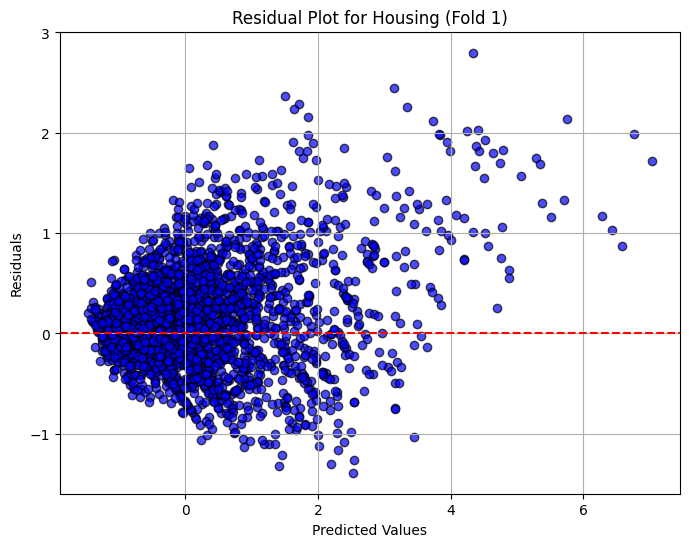


Model Results for Food (Fold 1):
Train Data (Food): {'MAE': 0.13300690592085354, 'MSE': 0.0368312879422946, 'RMSE': 0.19191479344306578, 'R-Squared': 0.9616624935529388, 'MAPE': 66.22356610595696}
Validation Data (Food): {'MAE': 0.20236492623932403, 'MSE': 0.08998487544648731, 'RMSE': 0.2999747913516856, 'R-Squared': 0.9223203504922538, 'MAPE': 83.90600515397331}
Test Data (Food): {'MAE': 0.20029042816872542, 'MSE': 0.08560218351699705, 'RMSE': 0.29257850829648624, 'R-Squared': 0.9240071221672841, 'MAPE': 99.53641520705943}


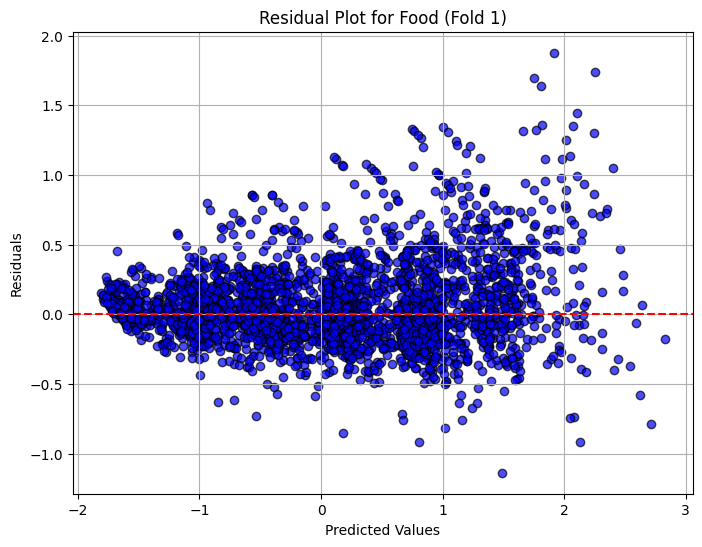


Model Results for Transportation (Fold 1):
Train Data (Transportation): {'MAE': 0.451856373453241, 'MSE': 0.34968435958506905, 'RMSE': 0.5913411532990657, 'R-Squared': 0.6519403221625785, 'MAPE': 247.76289701152558}
Validation Data (Transportation): {'MAE': 0.4806893057699593, 'MSE': 0.4499250628261615, 'RMSE': 0.6707645360528249, 'R-Squared': 0.5332042203141205, 'MAPE': 405.65228469507497}
Test Data (Transportation): {'MAE': 0.4692305571363989, 'MSE': 0.3863689621770173, 'RMSE': 0.6215858445758055, 'R-Squared': 0.5932588573688241, 'MAPE': 340.9793850051642}


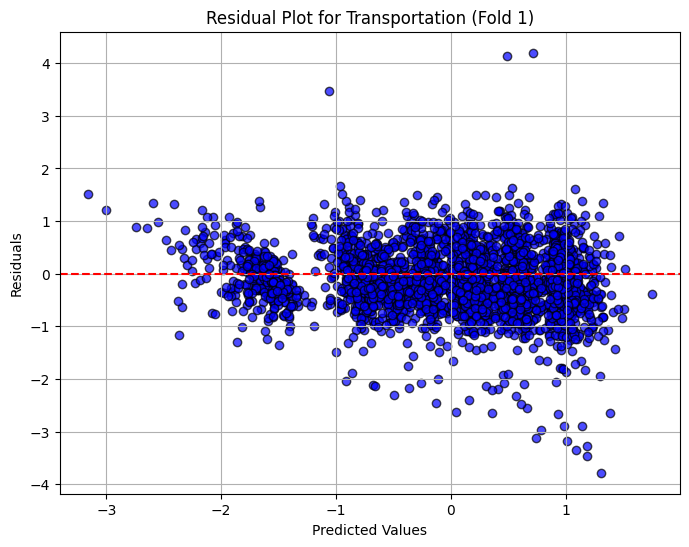


Model Results for Healthcare (Fold 1):
Train Data (Healthcare): {'MAE': 0.32486629846079756, 'MSE': 0.20546440413112796, 'RMSE': 0.4532818153545628, 'R-Squared': 0.7955622284543182, 'MAPE': 252.0109761668552}
Validation Data (Healthcare): {'MAE': 0.33603166050943906, 'MSE': 0.20080109513165856, 'RMSE': 0.44810835199944504, 'R-Squared': 0.7972569318258791, 'MAPE': 347.2739511332508}
Test Data (Healthcare): {'MAE': 0.3267749226089666, 'MSE': 0.19106128074360534, 'RMSE': 0.43710557162269775, 'R-Squared': 0.8025667414647808, 'MAPE': 319.56091163606055}


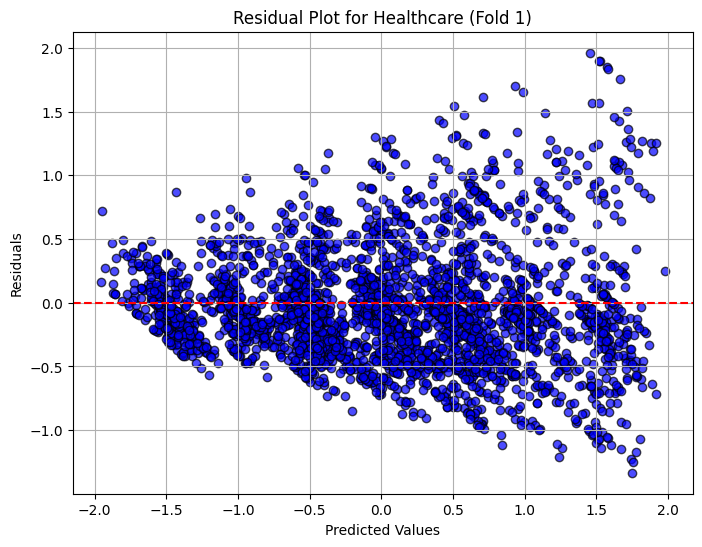


Model Results for Othernecessities (Fold 1):
Train Data (Othernecessities): {'MAE': 0.19686698938464953, 'MSE': 0.06927049991256289, 'RMSE': 0.2631928948747722, 'R-Squared': 0.9204881654500178, 'MAPE': 115.04045097804811}
Validation Data (Othernecessities): {'MAE': 0.24914644950927428, 'MSE': 0.12288415372536893, 'RMSE': 0.35054836146439045, 'R-Squared': 0.916097792769874, 'MAPE': 124.116562409613}
Test Data (Othernecessities): {'MAE': 0.23817800653998217, 'MSE': 0.1097139516973233, 'RMSE': 0.3312309642791919, 'R-Squared': 0.9230205900397933, 'MAPE': 140.8458479140259}


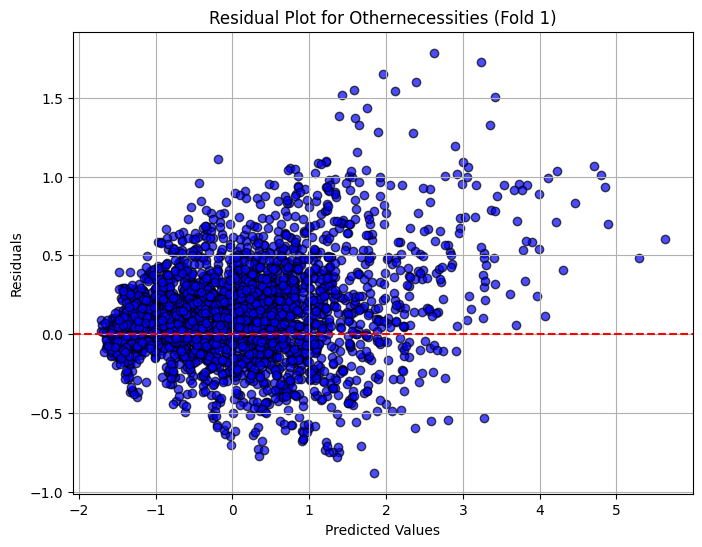


Model Results for Childcare (Fold 1):
Train Data (Childcare): {'MAE': 0.24923359715437338, 'MSE': 0.10921682275049073, 'RMSE': 0.3304796858363472, 'R-Squared': 0.8882068649953457, 'MAPE': 142.72541228238435}
Validation Data (Childcare): {'MAE': 0.26070817586807354, 'MSE': 0.165968397656847, 'RMSE': 0.4073921914529622, 'R-Squared': 0.8455748580099436, 'MAPE': 144.92488193230403}
Test Data (Childcare): {'MAE': 0.26211417775383167, 'MSE': 0.16394843176958257, 'RMSE': 0.40490546028620383, 'R-Squared': 0.8514219269065191, 'MAPE': 135.1705971528847}


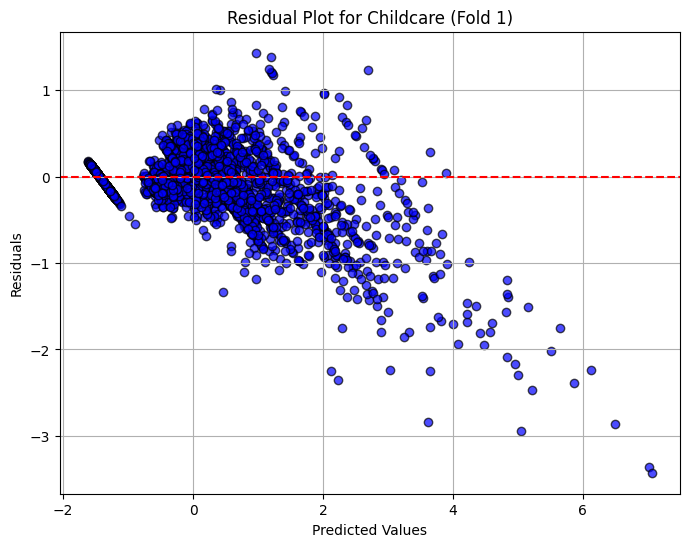


Model Results for Taxes (Fold 1):
Train Data (Taxes): {'MAE': 0.23184552457334845, 'MSE': 0.09115308252893636, 'RMSE': 0.3019156877820965, 'R-Squared': 0.8949773964903258, 'MAPE': 135.7316030621391}
Validation Data (Taxes): {'MAE': 0.28842449974748474, 'MSE': 0.14305882754626564, 'RMSE': 0.3782311826730652, 'R-Squared': 0.9023494709364934, 'MAPE': 214.2668782063243}
Test Data (Taxes): {'MAE': 0.2907988342140205, 'MSE': 0.14187076624360598, 'RMSE': 0.37665735920542687, 'R-Squared': 0.9058391122007143, 'MAPE': 183.24822642148422}


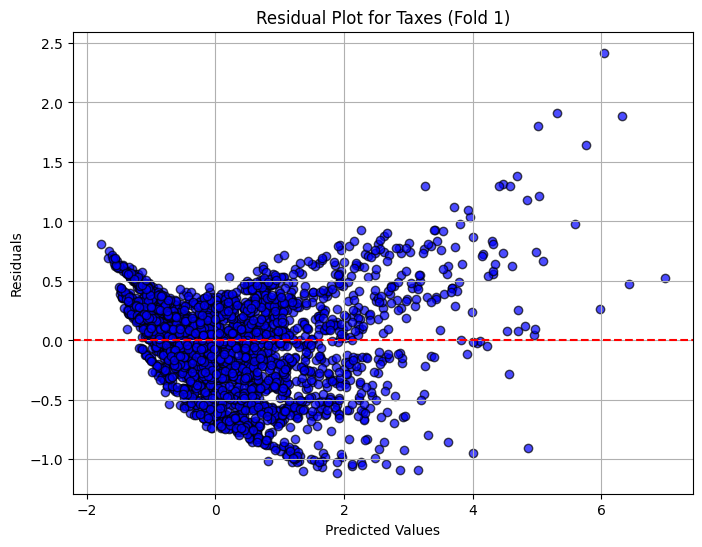


Fold 2/5
Model Results for Housing (Fold 2):
Train Data (Housing): {'MAE': 0.3291742963497259, 'MSE': 0.1906372637653696, 'RMSE': 0.43662027411169263, 'R-Squared': 0.8197147473993, 'MAPE': 260.1837109407883}
Validation Data (Housing): {'MAE': 0.27858819063686313, 'MSE': 0.13302592037744224, 'RMSE': 0.36472718623300104, 'R-Squared': 0.8132093448457465, 'MAPE': 225.28485027656325}
Test Data (Housing): {'MAE': 0.2838396364601632, 'MSE': 0.13632963376895774, 'RMSE': 0.36922843033677366, 'R-Squared': 0.8126281333820926, 'MAPE': 214.8197644709877}


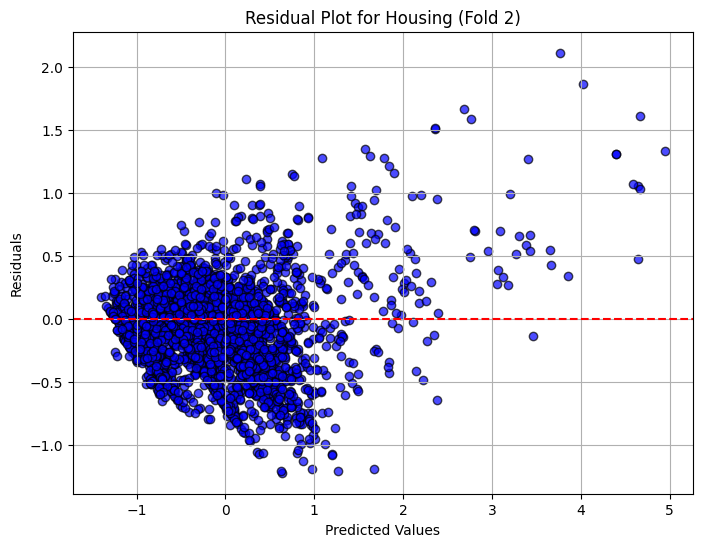


Model Results for Food (Fold 2):
Train Data (Food): {'MAE': 0.15257935164263775, 'MSE': 0.05016853023517382, 'RMSE': 0.22398332579719818, 'R-Squared': 0.9507081947730391, 'MAPE': 80.40180942806894}
Validation Data (Food): {'MAE': 0.13666787293298552, 'MSE': 0.032034998176621046, 'RMSE': 0.17898323434506666, 'R-Squared': 0.9647266274112588, 'MAPE': 73.08083322689743}
Test Data (Food): {'MAE': 0.13971837463582332, 'MSE': 0.03389196257319578, 'RMSE': 0.18409769844622115, 'R-Squared': 0.9638368276253175, 'MAPE': 69.42787153333416}


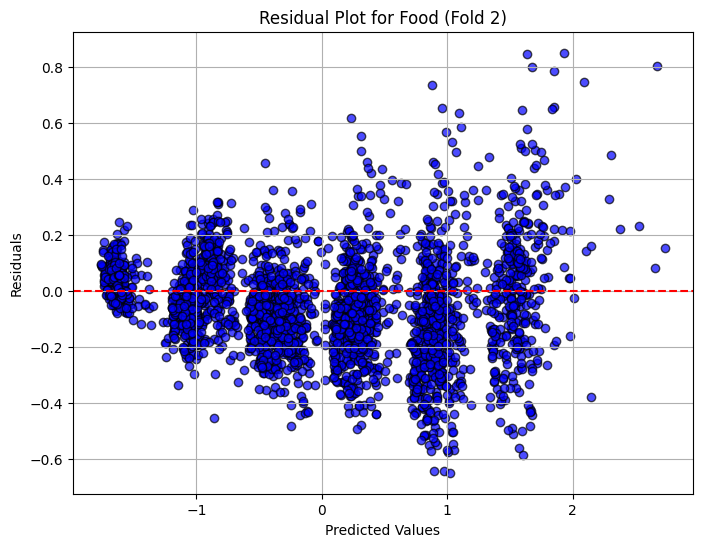


Model Results for Transportation (Fold 2):
Train Data (Transportation): {'MAE': 0.4606347802861696, 'MSE': 0.3844313740775895, 'RMSE': 0.6200253011592265, 'R-Squared': 0.6236722219022999, 'MAPE': 266.0340148061771}
Validation Data (Transportation): {'MAE': 0.41178322206022894, 'MSE': 0.26066179354769164, 'RMSE': 0.5105504809004606, 'R-Squared': 0.7077757212658486, 'MAPE': 245.7809810102634}
Test Data (Transportation): {'MAE': 0.429959223463141, 'MSE': 0.28108599941102436, 'RMSE': 0.5301754421048039, 'R-Squared': 0.6982350423091355, 'MAPE': 209.99764001180063}


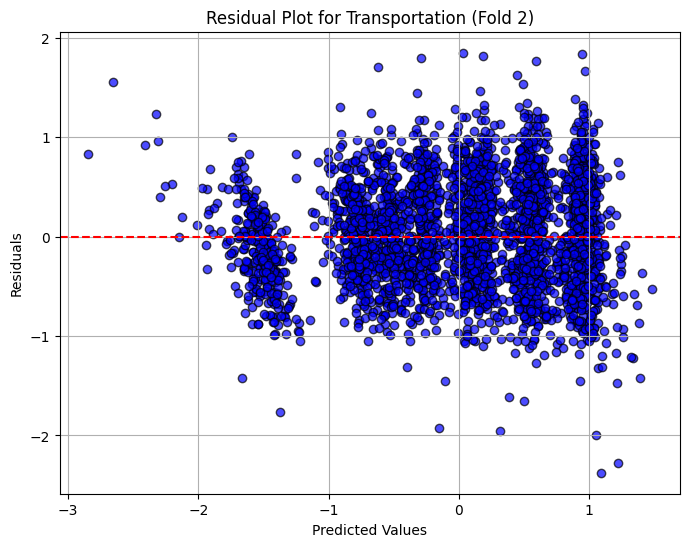


Model Results for Healthcare (Fold 2):
Train Data (Healthcare): {'MAE': 0.3239966992928415, 'MSE': 0.20703822435679237, 'RMSE': 0.4550145320281456, 'R-Squared': 0.7947220322185685, 'MAPE': 282.2228983143983}
Validation Data (Healthcare): {'MAE': 0.31859166314673104, 'MSE': 0.17741069528615686, 'RMSE': 0.4212014901281296, 'R-Squared': 0.8125687419418309, 'MAPE': 215.51135289497435}
Test Data (Healthcare): {'MAE': 0.32069077520079936, 'MSE': 0.19117100893458452, 'RMSE': 0.4372310704130992, 'R-Squared': 0.8058880292832911, 'MAPE': 223.0203157826114}


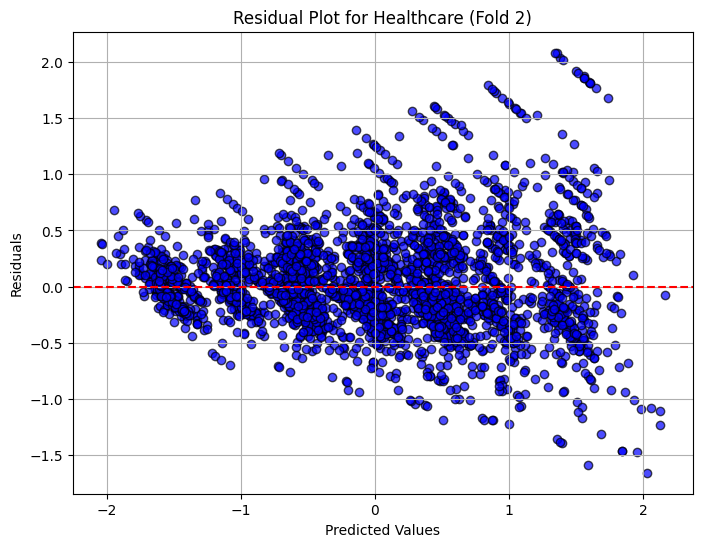


Model Results for Othernecessities (Fold 2):
Train Data (Othernecessities): {'MAE': 0.21298094356339123, 'MSE': 0.08179135056057064, 'RMSE': 0.28599187149387767, 'R-Squared': 0.9210118829928771, 'MAPE': 121.78491734941576}
Validation Data (Othernecessities): {'MAE': 0.18253304992189956, 'MSE': 0.058260620252261516, 'RMSE': 0.2413723684522765, 'R-Squared': 0.9285625960172419, 'MAPE': 129.74456145466476}
Test Data (Othernecessities): {'MAE': 0.18436449268741634, 'MSE': 0.0595135101264606, 'RMSE': 0.2439539098404873, 'R-Squared': 0.9290604063264163, 'MAPE': 111.6747371792082}


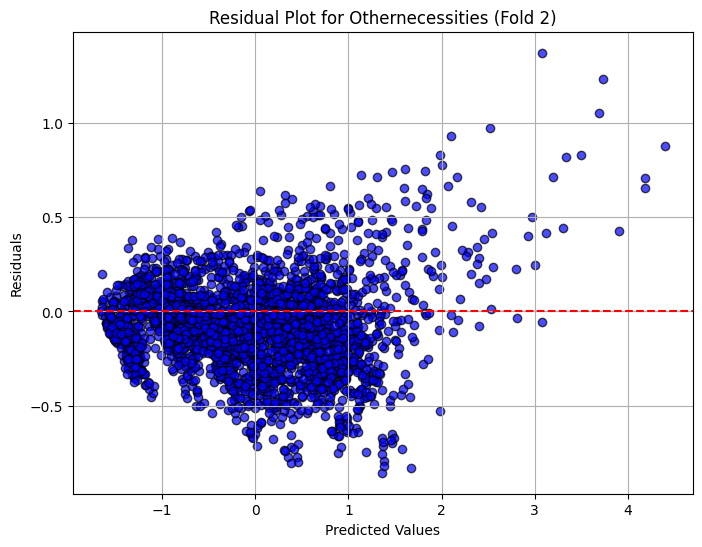


Model Results for Childcare (Fold 2):
Train Data (Childcare): {'MAE': 0.2535478794373872, 'MSE': 0.12130922634569015, 'RMSE': 0.3482947406230679, 'R-Squared': 0.8842928347250402, 'MAPE': 141.38952580500552}
Validation Data (Childcare): {'MAE': 0.23789445055873357, 'MSE': 0.09406791079146597, 'RMSE': 0.3067049246286501, 'R-Squared': 0.8813039496593722, 'MAPE': 125.25120811306623}
Test Data (Childcare): {'MAE': 0.23994871528991987, 'MSE': 0.09203929472811334, 'RMSE': 0.3033797862879354, 'R-Squared': 0.884701427689232, 'MAPE': 130.07139209480138}


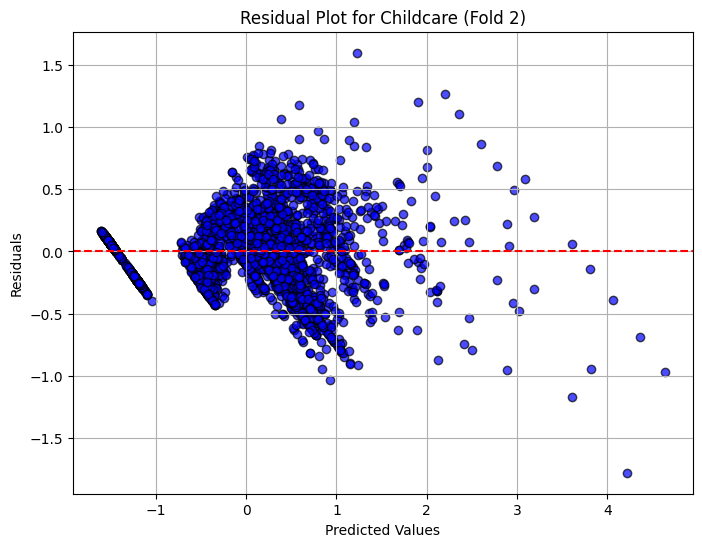


Model Results for Taxes (Fold 2):
Train Data (Taxes): {'MAE': 0.2545356589430508, 'MSE': 0.107159593473083, 'RMSE': 0.3273523995224153, 'R-Squared': 0.9002719004764521, 'MAPE': 146.02845558505263}
Validation Data (Taxes): {'MAE': 0.22249617915000067, 'MSE': 0.07719052695566349, 'RMSE': 0.27783183214970797, 'R-Squared': 0.8875563338473528, 'MAPE': 122.09211966679665}
Test Data (Taxes): {'MAE': 0.22468259570713858, 'MSE': 0.07903440956148941, 'RMSE': 0.2811305916500184, 'R-Squared': 0.8897303352839163, 'MAPE': 111.57926470797463}


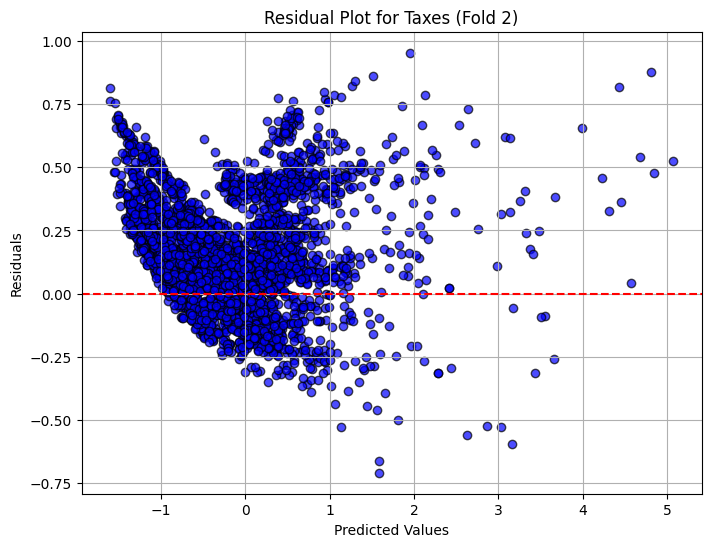


Fold 3/5
Model Results for Housing (Fold 3):
Train Data (Housing): {'MAE': 0.31220687058986, 'MSE': 0.17170974327075808, 'RMSE': 0.4143787437487088, 'R-Squared': 0.8322914657814616, 'MAPE': 239.74919599742717}
Validation Data (Housing): {'MAE': 0.36189261901943937, 'MSE': 0.21085374507989768, 'RMSE': 0.4591881369111115, 'R-Squared': 0.7733282542437909, 'MAPE': 403.41779456851754}
Test Data (Housing): {'MAE': 0.3591679371273181, 'MSE': 0.21196326569191612, 'RMSE': 0.4603946846912072, 'R-Squared': 0.7556696845588247, 'MAPE': 276.2551824559538}


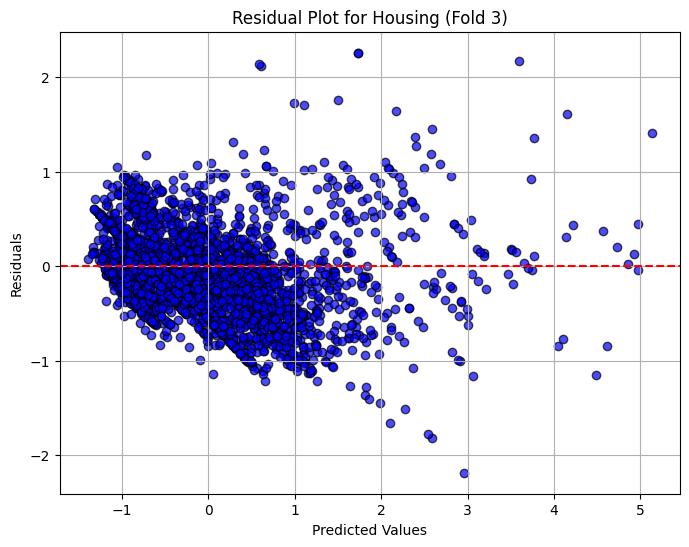


Model Results for Food (Fold 3):
Train Data (Food): {'MAE': 0.15274704958169613, 'MSE': 0.04733823868381546, 'RMSE': 0.21757352477683367, 'R-Squared': 0.952747707123147, 'MAPE': 77.53557037870723}
Validation Data (Food): {'MAE': 0.13337400695637253, 'MSE': 0.03696923751547667, 'RMSE': 0.19227386071818672, 'R-Squared': 0.9623763614730104, 'MAPE': 63.759449160057066}
Test Data (Food): {'MAE': 0.13430454351995977, 'MSE': 0.05027096009806251, 'RMSE': 0.22421186431155357, 'R-Squared': 0.9498393092615133, 'MAPE': 67.98008756727482}


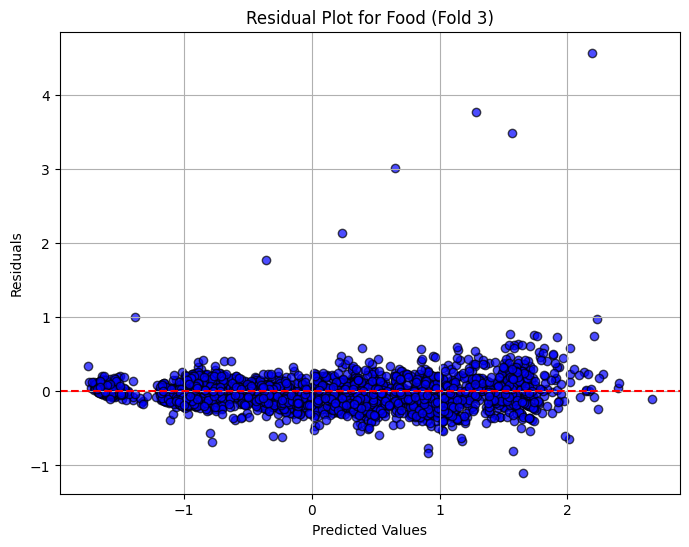


Model Results for Transportation (Fold 3):
Train Data (Transportation): {'MAE': 0.4379796470275791, 'MSE': 0.3370491091857921, 'RMSE': 0.5805593072079649, 'R-Squared': 0.652830894776244, 'MAPE': 247.18578153563527}
Validation Data (Transportation): {'MAE': 0.5010868682766857, 'MSE': 0.46173864004057236, 'RMSE': 0.679513531903944, 'R-Squared': 0.5872314972039929, 'MAPE': 261.2409720326396}
Test Data (Transportation): {'MAE': 0.49614159966187577, 'MSE': 0.4620811643461761, 'RMSE': 0.6797655215926858, 'R-Squared': 0.5793816094618176, 'MAPE': 307.11001469276107}


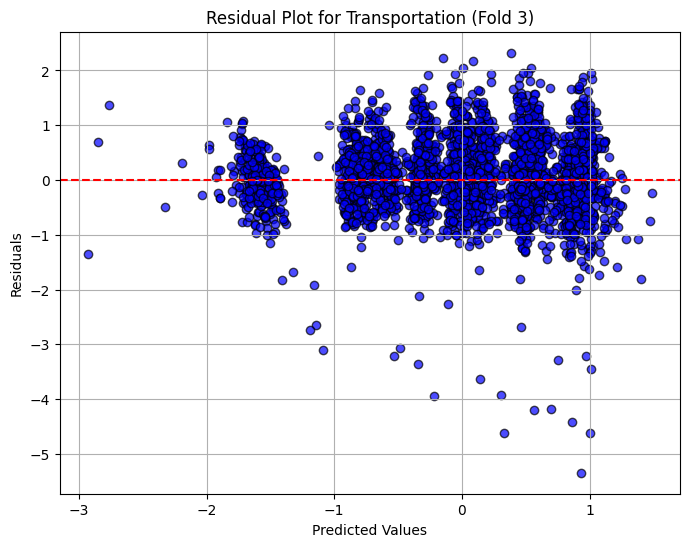


Model Results for Healthcare (Fold 3):
Train Data (Healthcare): {'MAE': 0.3184499205299771, 'MSE': 0.20064404857874918, 'RMSE': 0.44793308493428924, 'R-Squared': 0.7994762971143942, 'MAPE': 240.440438522716}
Validation Data (Healthcare): {'MAE': 0.33190679541733054, 'MSE': 0.20506463548813136, 'RMSE': 0.4528406292374077, 'R-Squared': 0.7914522746452373, 'MAPE': 364.90472915037094}
Test Data (Healthcare): {'MAE': 0.3406949929605697, 'MSE': 0.2122266947038433, 'RMSE': 0.46068068627178554, 'R-Squared': 0.7885300781459981, 'MAPE': 403.4991455395017}


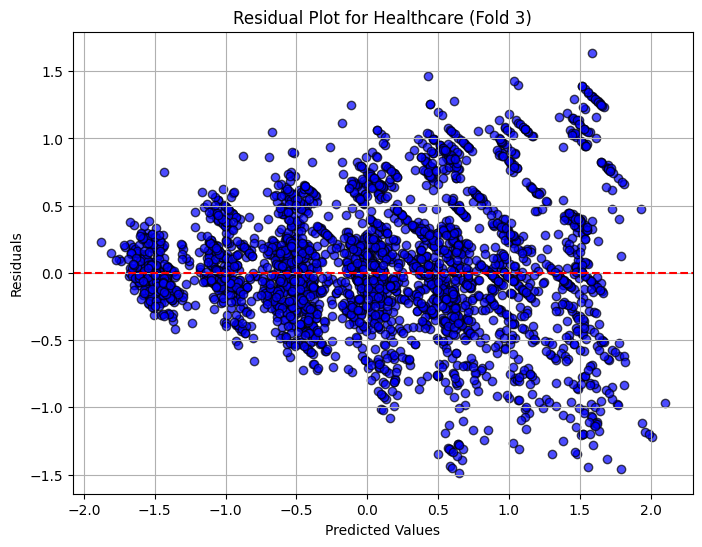


Model Results for Othernecessities (Fold 3):
Train Data (Othernecessities): {'MAE': 0.20236451182078077, 'MSE': 0.07440131249430233, 'RMSE': 0.27276603984789294, 'R-Squared': 0.9266332920848886, 'MAPE': 113.18392037232421}
Validation Data (Othernecessities): {'MAE': 0.2297052670561901, 'MSE': 0.08722920691262578, 'RMSE': 0.2953459106075887, 'R-Squared': 0.9084116556406667, 'MAPE': 195.05965390614605}
Test Data (Othernecessities): {'MAE': 0.23173168436520628, 'MSE': 0.08919383480573066, 'RMSE': 0.2986533689843975, 'R-Squared': 0.9042970800295682, 'MAPE': 134.08920335413984}


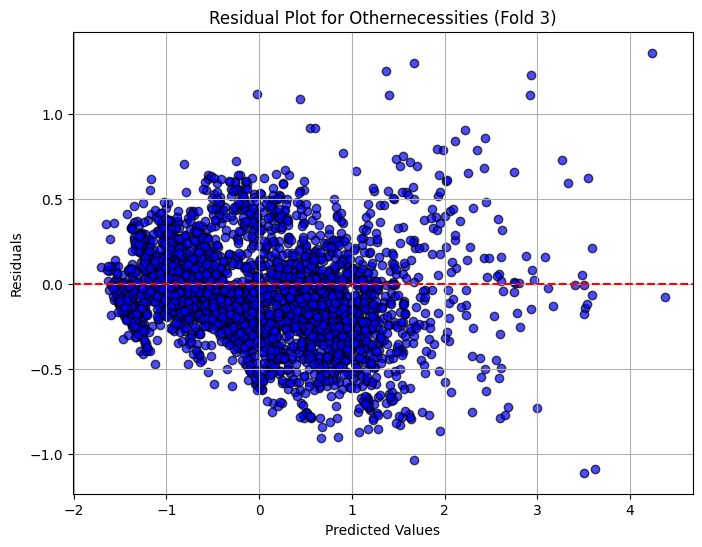


Model Results for Childcare (Fold 3):
Train Data (Childcare): {'MAE': 0.23910071970998495, 'MSE': 0.10806701712643296, 'RMSE': 0.32873548200100483, 'R-Squared': 0.8860667007699847, 'MAPE': 123.24264745172701}
Validation Data (Childcare): {'MAE': 0.29128573916264117, 'MSE': 0.15412462542525757, 'RMSE': 0.39258709278994075, 'R-Squared': 0.8750683673986857, 'MAPE': 217.15626425591114}
Test Data (Childcare): {'MAE': 0.2918034418223965, 'MSE': 0.15203978770663798, 'RMSE': 0.38992279711070754, 'R-Squared': 0.8708663360933411, 'MAPE': 188.23600005226427}


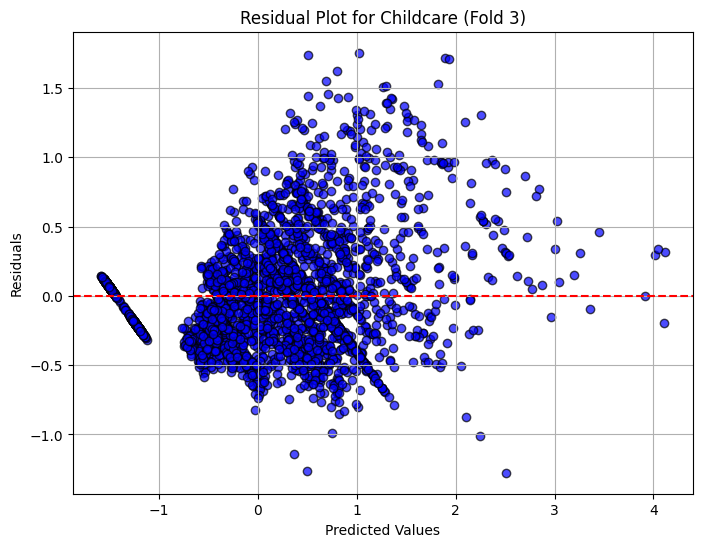


Model Results for Taxes (Fold 3):
Train Data (Taxes): {'MAE': 0.25567593544438605, 'MSE': 0.10780441700953573, 'RMSE': 0.32833582961586105, 'R-Squared': 0.8919595206241372, 'MAPE': 153.62154706695836}
Validation Data (Taxes): {'MAE': 0.20072165294906888, 'MSE': 0.07338779200374392, 'RMSE': 0.2709018124777756, 'R-Squared': 0.9296959475253439, 'MAPE': 76.15216564171101}
Test Data (Taxes): {'MAE': 0.1918745266497388, 'MSE': 0.06503144453373777, 'RMSE': 0.25501263602758545, 'R-Squared': 0.9315970869812444, 'MAPE': 115.9807745768579}


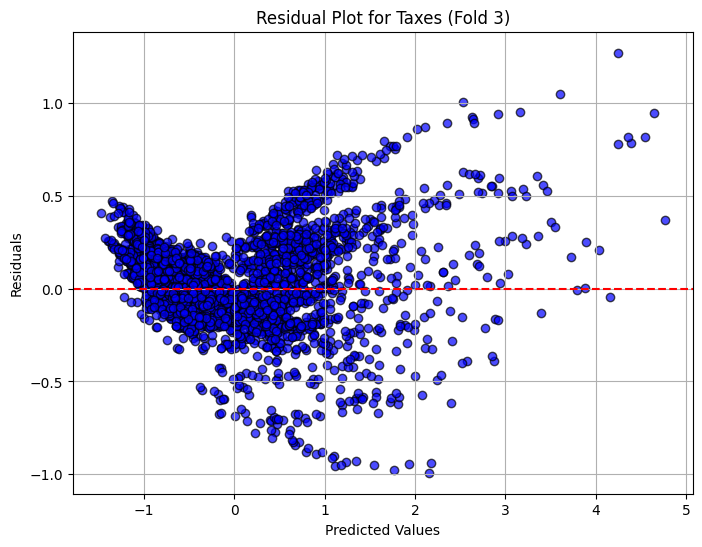


Fold 4/5
Model Results for Housing (Fold 4):
Train Data (Housing): {'MAE': 0.33511017483464606, 'MSE': 0.1950014537349475, 'RMSE': 0.4415896893440193, 'R-Squared': 0.8222401938589017, 'MAPE': 240.1207874511718}
Validation Data (Housing): {'MAE': 0.26812725676562854, 'MSE': 0.11924187782110922, 'RMSE': 0.34531417263284925, 'R-Squared': 0.7992935049640738, 'MAPE': 327.85899243240533}
Test Data (Housing): {'MAE': 0.26502331433131343, 'MSE': 0.11552544780027843, 'RMSE': 0.3398903467300571, 'R-Squared': 0.8035851589015137, 'MAPE': 317.498062374843}


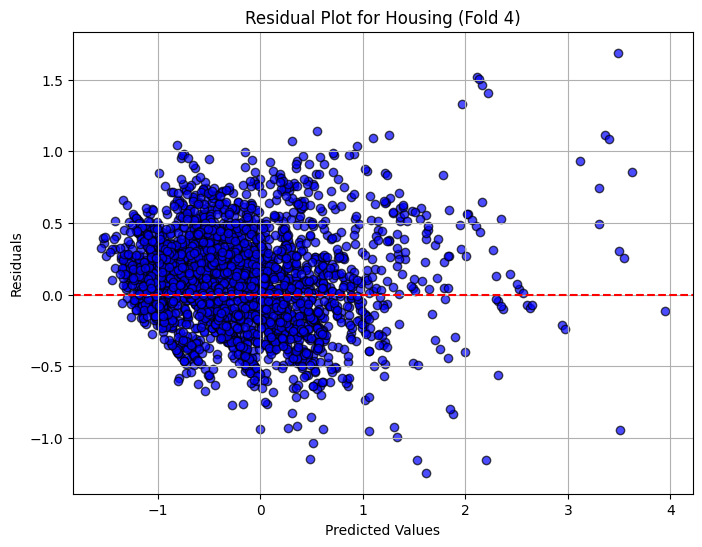


Model Results for Food (Fold 4):
Train Data (Food): {'MAE': 0.15268711697980075, 'MSE': 0.049544405381628624, 'RMSE': 0.2225857259161706, 'R-Squared': 0.9507205803599952, 'MAPE': 73.89051106906425}
Validation Data (Food): {'MAE': 0.12892654768922515, 'MSE': 0.03225120989495972, 'RMSE': 0.17958621855521018, 'R-Squared': 0.9675389420460481, 'MAPE': 56.14280681920163}
Test Data (Food): {'MAE': 0.13020150916169532, 'MSE': 0.037649448255058275, 'RMSE': 0.19403465735547934, 'R-Squared': 0.9608945925282691, 'MAPE': 88.73503263658513}


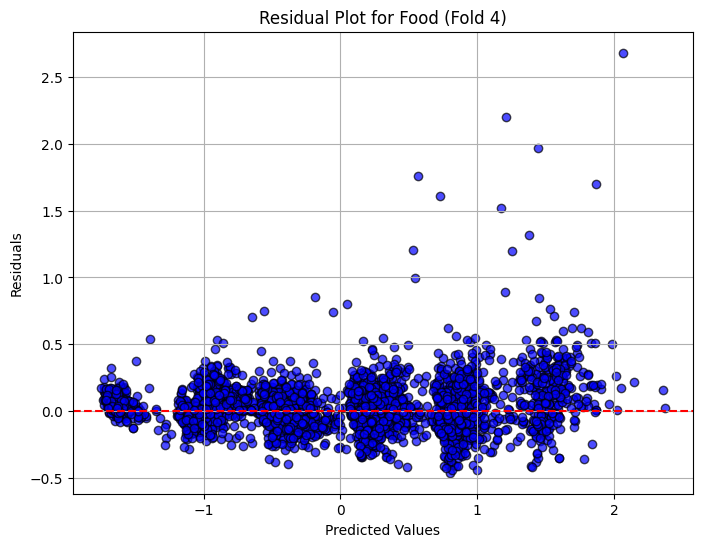


Model Results for Transportation (Fold 4):
Train Data (Transportation): {'MAE': 0.4506883448119752, 'MSE': 0.36227970675123783, 'RMSE': 0.6018967575516899, 'R-Squared': 0.636060926021482, 'MAPE': 267.3177764922577}
Validation Data (Transportation): {'MAE': 0.4634108550456058, 'MSE': 0.3719950705184213, 'RMSE': 0.6099139861639683, 'R-Squared': 0.6359450738862633, 'MAPE': 215.03358655928017}
Test Data (Transportation): {'MAE': 0.444640322655985, 'MSE': 0.3484631470677373, 'RMSE': 0.5903076715304801, 'R-Squared': 0.6564985876204479, 'MAPE': 235.13752211054683}


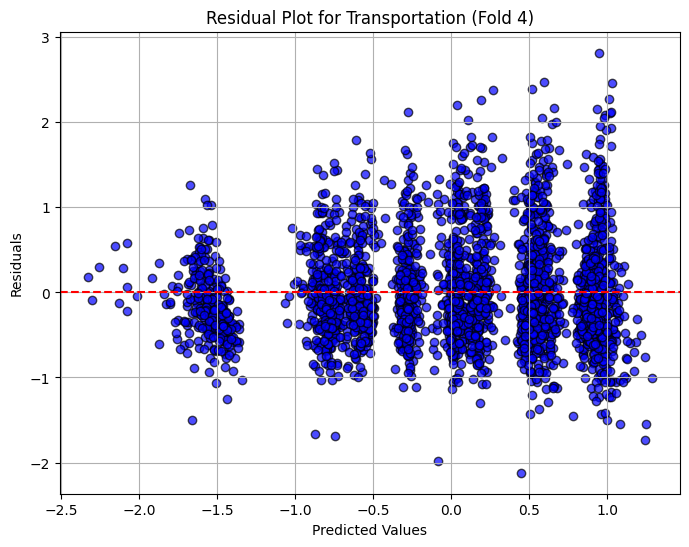


Model Results for Healthcare (Fold 4):
Train Data (Healthcare): {'MAE': 0.3407309482119964, 'MSE': 0.22030500506394685, 'RMSE': 0.46936659985979706, 'R-Squared': 0.785387623359182, 'MAPE': 276.39903127264205}
Validation Data (Healthcare): {'MAE': 0.27161080545306887, 'MSE': 0.13542054657096972, 'RMSE': 0.36799530781107753, 'R-Squared': 0.8531709385148458, 'MAPE': 257.8784899438182}
Test Data (Healthcare): {'MAE': 0.25983352491458844, 'MSE': 0.1235178826581671, 'RMSE': 0.3514511099117018, 'R-Squared': 0.8561413068064228, 'MAPE': 226.34057298125083}


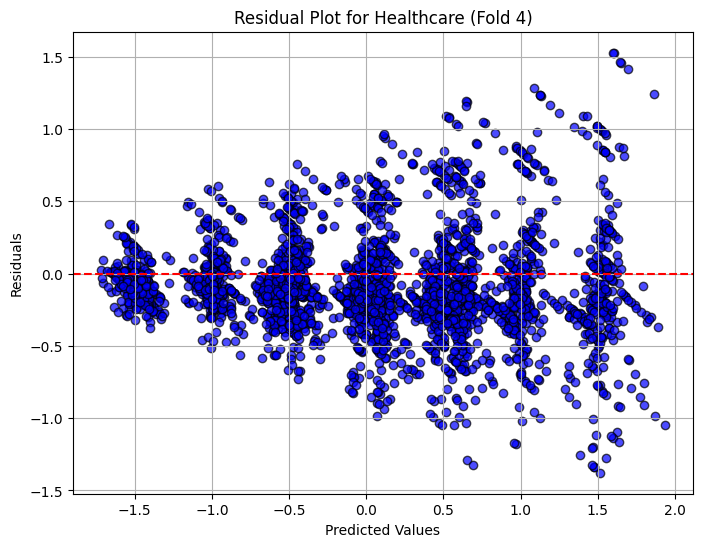


Model Results for Othernecessities (Fold 4):
Train Data (Othernecessities): {'MAE': 0.2159367266835682, 'MSE': 0.0837179025266668, 'RMSE': 0.2893404612678061, 'R-Squared': 0.92031428621062, 'MAPE': 132.24797604389212}
Validation Data (Othernecessities): {'MAE': 0.17467951045452235, 'MSE': 0.05189031564142717, 'RMSE': 0.22779445919825875, 'R-Squared': 0.9352437962848439, 'MAPE': 78.2560668856594}
Test Data (Othernecessities): {'MAE': 0.17034528340437743, 'MSE': 0.049574905040876305, 'RMSE': 0.22265422753874742, 'R-Squared': 0.9365628436129486, 'MAPE': 79.22925600671783}


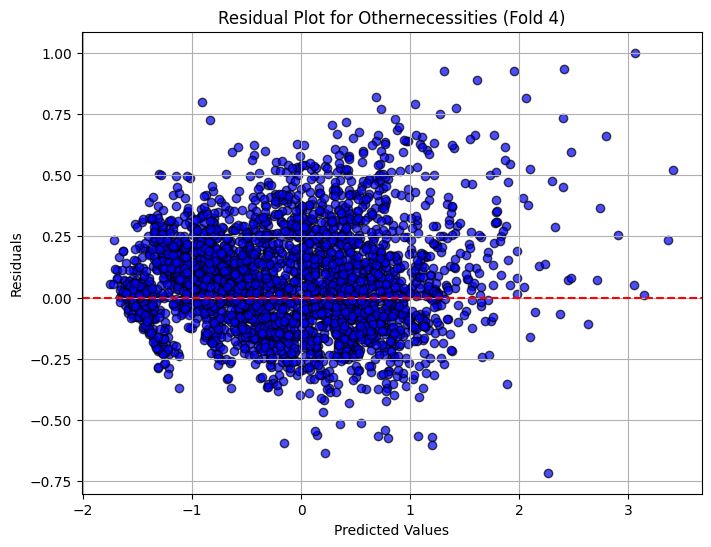


Model Results for Childcare (Fold 4):
Train Data (Childcare): {'MAE': 0.2494981511537528, 'MSE': 0.11653990270281239, 'RMSE': 0.3413794116563159, 'R-Squared': 0.8886951976552766, 'MAPE': 130.1561065322098}
Validation Data (Childcare): {'MAE': 0.25469714187238157, 'MSE': 0.1135194461209907, 'RMSE': 0.3369264699025452, 'R-Squared': 0.8609301835585619, 'MAPE': 195.79200143154554}
Test Data (Childcare): {'MAE': 0.250972230539276, 'MSE': 0.11082183116926093, 'RMSE': 0.332899130622567, 'R-Squared': 0.8607013589545816, 'MAPE': 161.07199541668516}


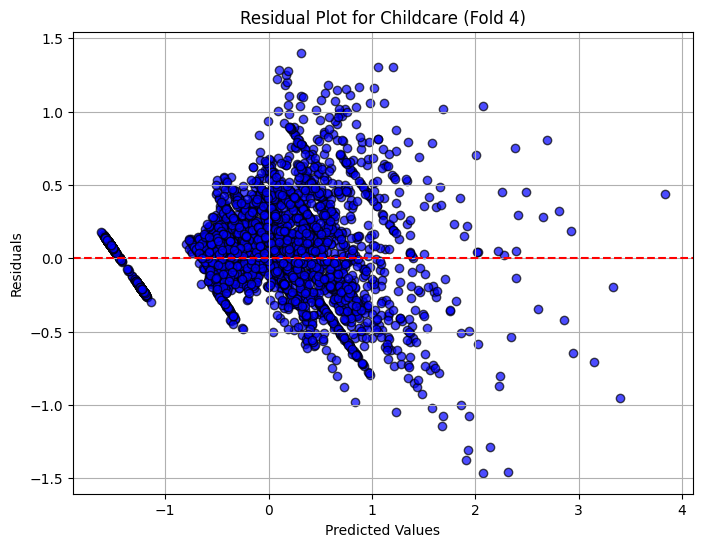


Model Results for Taxes (Fold 4):
Train Data (Taxes): {'MAE': 0.23537688622195266, 'MSE': 0.09514086259336711, 'RMSE': 0.30844912480564296, 'R-Squared': 0.9091788244732109, 'MAPE': 154.9434770544791}
Validation Data (Taxes): {'MAE': 0.27971303370250344, 'MSE': 0.12423754039068846, 'RMSE': 0.35247346054800843, 'R-Squared': 0.8341484318445455, 'MAPE': 138.49583416611136}
Test Data (Taxes): {'MAE': 0.2871473845208616, 'MSE': 0.1317128572575766, 'RMSE': 0.3629226601599528, 'R-Squared': 0.8277675693187215, 'MAPE': 134.8100386703403}


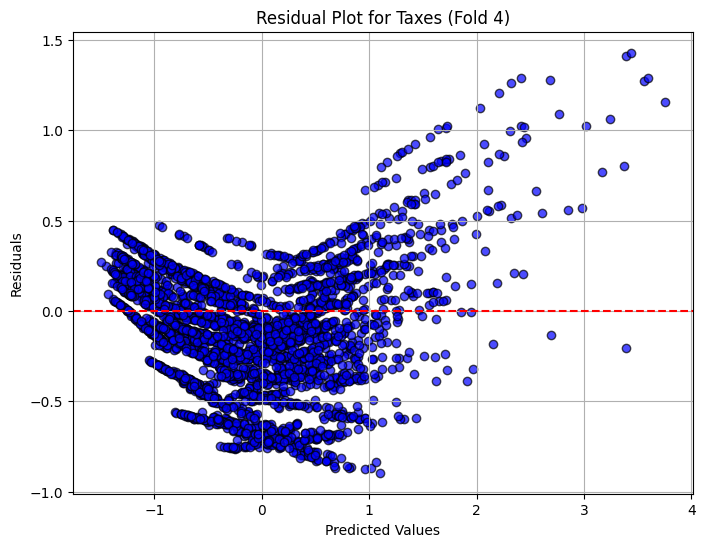


Fold 5/5
Model Results for Housing (Fold 5):
Train Data (Housing): {'MAE': 0.30958414137701085, 'MSE': 0.1661134968767797, 'RMSE': 0.4075702355138065, 'R-Squared': 0.8398066497978408, 'MAPE': 252.41016454506516}
Validation Data (Housing): {'MAE': 0.45101105590309637, 'MSE': 0.30259850127014404, 'RMSE': 0.5500895393207764, 'R-Squared': 0.6457161361294792, 'MAPE': 305.31698993476965}
Test Data (Housing): {'MAE': 0.4491053744924253, 'MSE': 0.3068617519062707, 'RMSE': 0.5539510374629428, 'R-Squared': 0.6296337507415173, 'MAPE': 309.48630911193715}


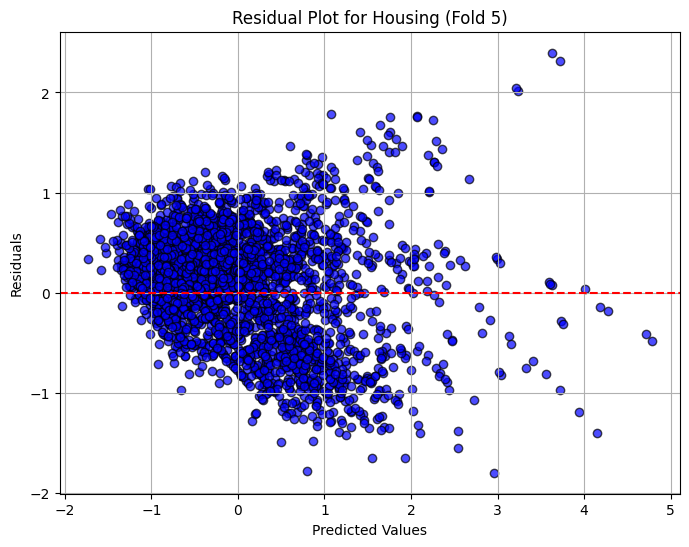


Model Results for Food (Fold 5):
Train Data (Food): {'MAE': 0.14961633162893426, 'MSE': 0.0478320408620992, 'RMSE': 0.21870537456153014, 'R-Squared': 0.9527799846535192, 'MAPE': 76.31229950183146}
Validation Data (Food): {'MAE': 0.15760247954117254, 'MSE': 0.044431537048237435, 'RMSE': 0.2107878958769631, 'R-Squared': 0.9527381414614605, 'MAPE': 74.46798735478293}
Test Data (Food): {'MAE': 0.15507164647132002, 'MSE': 0.04233336161106686, 'RMSE': 0.2057507268785869, 'R-Squared': 0.9551976291862453, 'MAPE': 72.02132506379769}


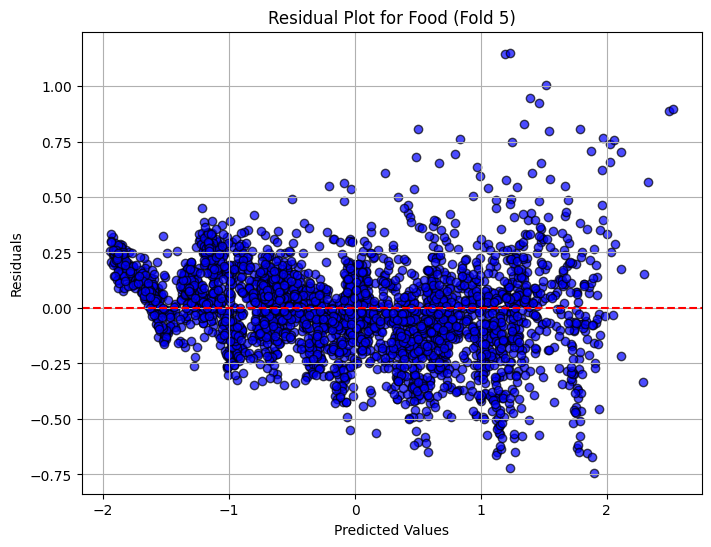


Model Results for Transportation (Fold 5):
Train Data (Transportation): {'MAE': 0.4552554105438761, 'MSE': 0.36919225984932097, 'RMSE': 0.6076119319510777, 'R-Squared': 0.6329176351264567, 'MAPE': 270.85730347771323}
Validation Data (Transportation): {'MAE': 0.4437401383015206, 'MSE': 0.35171503609256427, 'RMSE': 0.5930556770595525, 'R-Squared': 0.6398631109183268, 'MAPE': 249.82037657238126}
Test Data (Transportation): {'MAE': 0.4260092140966674, 'MSE': 0.31391318644062494, 'RMSE': 0.560279560969901, 'R-Squared': 0.6780662972433917, 'MAPE': 183.18194679758037}


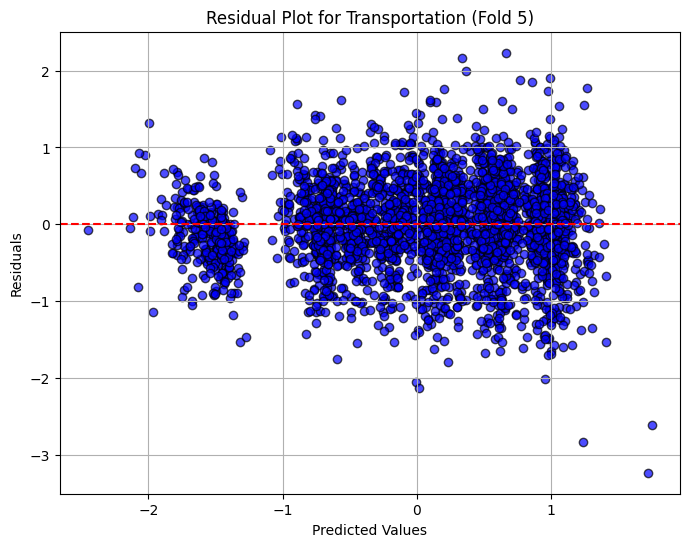


Model Results for Healthcare (Fold 5):
Train Data (Healthcare): {'MAE': 0.29988463571614077, 'MSE': 0.17006041056830867, 'RMSE': 0.41238381462941615, 'R-Squared': 0.8226424419010836, 'MAPE': 276.6883321495011}
Validation Data (Healthcare): {'MAE': 0.3979561922798018, 'MSE': 0.3425681823988718, 'RMSE': 0.585293244791764, 'R-Squared': 0.7052247868559296, 'MAPE': 157.36167951423536}
Test Data (Healthcare): {'MAE': 0.39596657994004086, 'MSE': 0.3361282780452202, 'RMSE': 0.5797657096148583, 'R-Squared': 0.7117506333418817, 'MAPE': 184.3410881838027}


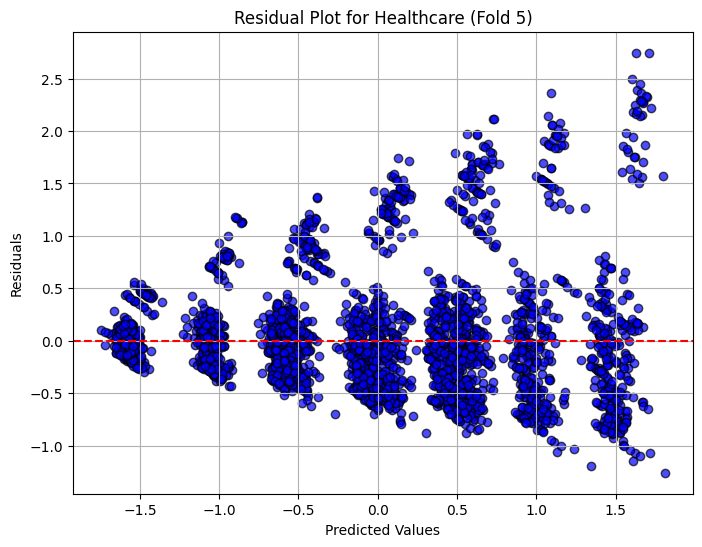


Model Results for Othernecessities (Fold 5):
Train Data (Othernecessities): {'MAE': 0.19794329967542193, 'MSE': 0.0693185841092918, 'RMSE': 0.26328422685244895, 'R-Squared': 0.9322514302820563, 'MAPE': 119.23285221613287}
Validation Data (Othernecessities): {'MAE': 0.3087242470208396, 'MSE': 0.14058740090645766, 'RMSE': 0.3749498645238556, 'R-Squared': 0.84607464213585, 'MAPE': 200.97557655715514}
Test Data (Othernecessities): {'MAE': 0.3062106285964047, 'MSE': 0.1406106306966053, 'RMSE': 0.37498084043935537, 'R-Squared': 0.8437846875899924, 'MAPE': 137.50308541800948}


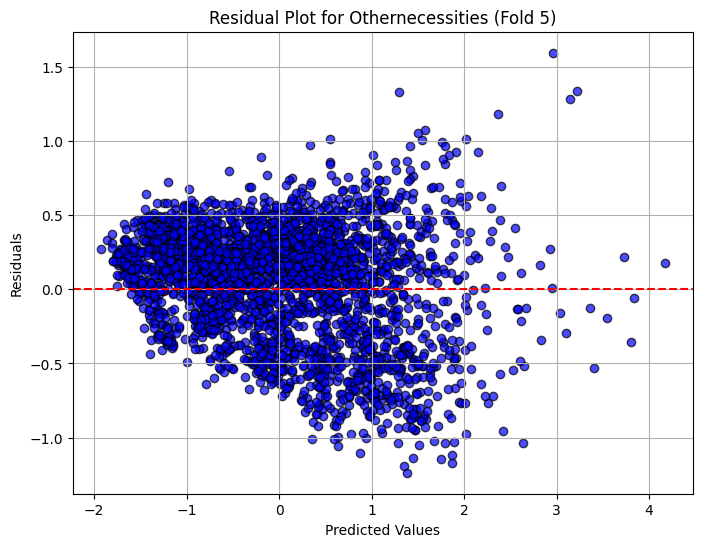


Model Results for Childcare (Fold 5):
Train Data (Childcare): {'MAE': 0.2501260069270679, 'MSE': 0.1160126404120574, 'RMSE': 0.340606283576885, 'R-Squared': 0.8813060603515381, 'MAPE': 156.25364745116798}
Validation Data (Childcare): {'MAE': 0.2574898653749201, 'MSE': 0.12426656085466145, 'RMSE': 0.352514625022369, 'R-Squared': 0.8860174391702994, 'MAPE': 77.32333396486638}
Test Data (Childcare): {'MAE': 0.26109273369187236, 'MSE': 0.12665008334782446, 'RMSE': 0.35587931008675466, 'R-Squared': 0.88084615014581, 'MAPE': 76.87219573252537}


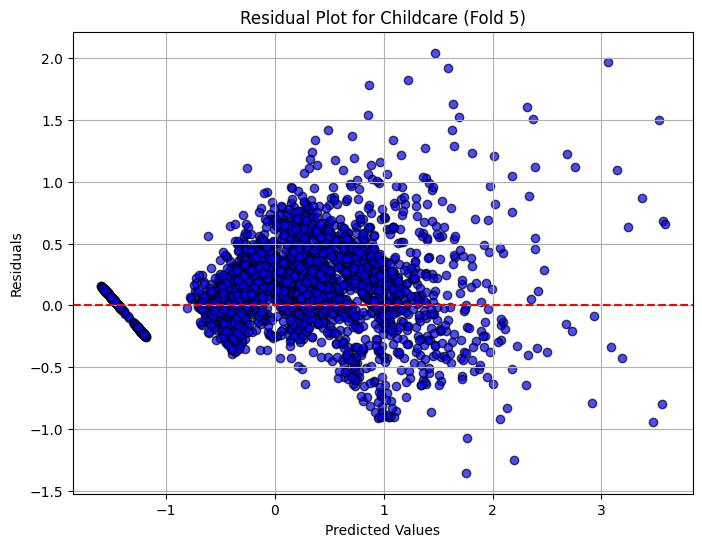


Model Results for Taxes (Fold 5):
Train Data (Taxes): {'MAE': 0.2204830139808906, 'MSE': 0.08287116308950686, 'RMSE': 0.28787351925716764, 'R-Squared': 0.917651807928303, 'MAPE': 127.17553451288497}
Validation Data (Taxes): {'MAE': 0.4781669922735104, 'MSE': 0.3574898530508934, 'RMSE': 0.597904551789743, 'R-Squared': 0.6309595537752184, 'MAPE': 375.3050289327633}
Test Data (Taxes): {'MAE': 0.4700862426474348, 'MSE': 0.35140355047598737, 'RMSE': 0.5927930081200244, 'R-Squared': 0.6341803280329095, 'MAPE': 398.64744023955166}


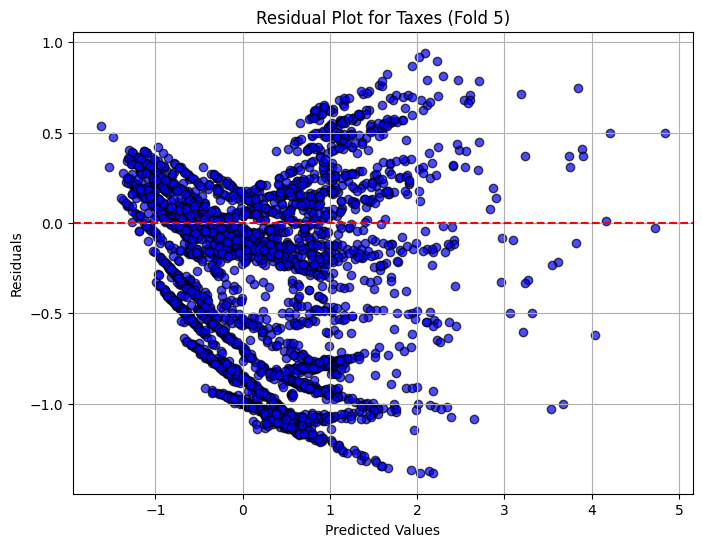


Final Average Metrics After Cross-Validation:
Results for Housing:
Average Train Metrics for Housing: {'MAE': 0.31796142894121326, 'MSE': 0.1768015028023307, 'RMSE': 0.42016806156998443, 'R-Squared': 0.8213657290413237, 'MAPE': 251.75298605582378}
Average Validation Metrics for Housing: {'MAE': 0.34630368730550914, 'MSE': 0.20832739532739772, 'RMSE': 0.44891939841541684, 'R-Squared': 0.7756990793559707, 'MAPE': 280.2389923893568}
Average Test Metrics for Housing: {'MAE': 0.3448343776732188, 'MSE': 0.20665831170185572, 'RMSE': 0.44718415983095905, 'R-Squared': 0.7706685795074177, 'MAPE': 254.9030000978077}

Results for Food:
Average Train Metrics for Food: {'MAE': 0.14812735115078451, 'MSE': 0.04634290062100234, 'RMSE': 0.2149525488989597, 'R-Squared': 0.9537237920925279, 'MAPE': 74.87275129672578}
Average Validation Metrics for Food: {'MAE': 0.15178716667181597, 'MSE': 0.04713437161635643, 'RMSE': 0.21232120016942244, 'R-Squared': 0.9539400845768065, 'MAPE': 70.27141634298248}
Average

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cross-Validation with Evaluation, Metrics, and Residual Plot
def cross_val_with_evaluation(X_scaled, y_exp_scaled, kf, target_col_list):
    fold = 1

    # To store metrics across all folds for each target
    metrics_summary = {target: {'train': [], 'val': [], 'test': []} for target in target_col_list}

    # To store loss values for each fold
    all_train_loss = []
    all_val_loss = []

    for train_index, val_index in kf.split(X_scaled):
        print(f"Fold {fold}/{kf.get_n_splits()}")
        X_train, X_val = X_scaled[train_index], X_scaled[val_index]
        y_train, y_val = y_exp_scaled[train_index], y_exp_scaled[val_index]

        # 50/50 split of remaining data for test set
        X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.5, random_state=100)

        # Create and fit the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # For each target column, calculate the metrics separately
        for i, target in enumerate(target_col_list):
            print(f'Model Results for {target.capitalize()} (Fold {fold}):')

            # Get the specific target for training, validation, and test sets
            y_train_target = y_train[:, i]
            y_val_target = y_val[:, i]
            y_test_target = y_test[:, i]

            # Predictions for the specific target
            y_train_pred = model.predict(X_train)[:, i]
            y_val_pred = model.predict(X_val)[:, i]
            y_test_pred = model.predict(X_test)[:, i]

            # Metrics calculation for this target
            train_metrics = calculate_metrics(y_train_target, y_train_pred)
            val_metrics = calculate_metrics(y_val_target, y_val_pred)
            test_metrics = calculate_metrics(y_test_target, y_test_pred)

            # Store metrics for this fold for each target
            metrics_summary[target]['train'].append(train_metrics)
            metrics_summary[target]['val'].append(val_metrics)
            metrics_summary[target]['test'].append(test_metrics)

            print(f'Train Data ({target.capitalize()}):', train_metrics)
            print(f'Validation Data ({target.capitalize()}):', val_metrics)
            print(f'Test Data ({target.capitalize()}):', test_metrics)

            # Residual Plot for the target
            plot_residuals(y_test_target, y_test_pred, target, fold)

            print()

        fold += 1

    # Compute and display final average metrics across all folds
    print("Final Average Metrics After Cross-Validation:")
    for target in target_col_list:
        print(f"Results for {target.capitalize()}:")

        avg_train_metrics = average_metrics(metrics_summary[target]['train'])
        avg_val_metrics = average_metrics(metrics_summary[target]['val'])
        avg_test_metrics = average_metrics(metrics_summary[target]['test'])

        print(f"Average Train Metrics for {target.capitalize()}:", avg_train_metrics)
        print(f"Average Validation Metrics for {target.capitalize()}:", avg_val_metrics)
        print(f"Average Test Metrics for {target.capitalize()}:", avg_test_metrics)
        print()

    return model

def calculate_metrics(y_true, y_pred):
    """Calculate regression metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-Squared': r2, 'MAPE': mape}

def average_metrics(metrics_list):
    """Compute the average of the metrics."""
    df = pd.DataFrame(metrics_list)
    return df.mean().to_dict()

def plot_residuals(y_true, y_pred, target, fold):
    """Generate a residual plot."""
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residual Plot for {target.capitalize()} (Fold {fold})')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

# Cross-Validation Execution
kf = KFold(n_splits=5)  # Define your KFold object here
target_col_list = ['housing', 'food', 'transportation', 'healthcare', 'othernecessities', 'childcare', 'taxes']  # List of target columns
model = cross_val_with_evaluation(X_scaled, y_exp_scaled, kf, target_col_list)



In [9]:
def get_prediction(model, input_data):
    input_data_val = input_data.values
    input_data_val_scaled = scaler_X.fit_transform(input_data_val)
    input_data_val_scaled = input_data_val_scaled[..., np.newaxis]
    input_data_pred = np.column_stack(model.predict(input_data_val_scaled))
    input_data_pred_original = scaler_y.inverse_transform(input_data_pred)
    return input_data_pred_original

In [10]:
input_data = pd.DataFrame(
              [[7000,40000, 50, 2, 0, 1]],
              columns=['total', 'median_family_income', 'num_counties_in_st', 'n_children', 'n_parents', 'n_members']
        )

input_data["per_member_cost"] = input_data["total"] / input_data["n_members"]
input_data["child_expense_cost"] = input_data["per_member_cost"]*input_data["n_children"]
input_data["parent_expense_cost"] = input_data["per_member_cost"]*input_data["n_parents"]
input_data["other_expense_cost"] = input_data["total"] - (input_data["child_expense_cost"]+input_data["parent_expense_cost"])